In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering # reversed Hierarchical
from sklearn.metrics import silhouette_samples

from scipy.cluster.hierarchy import linkage, dendrogram

# Clustering

In [3]:
attrs, clusters = make_blobs()

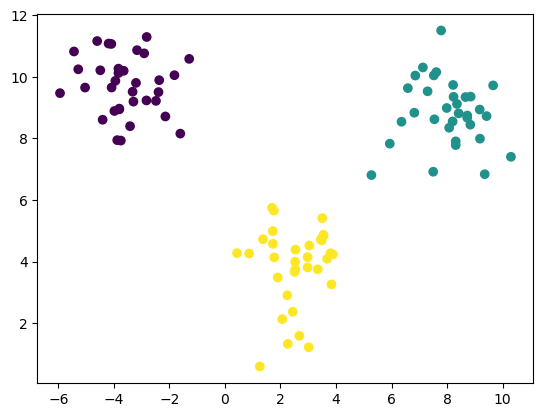

In [4]:
plt.scatter(attrs[:, 0], attrs[:, 1], c=clusters)
plt.show()

In [5]:
k_means = KMeans(init="random", n_clusters=3 )

In [6]:
k_means.fit(attrs)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [7]:
predictions = k_means.predict(attrs)

In [8]:
def plot(attrs, predictions):
    plt.scatter(attrs[:, 0], attrs[:, 1], c= predictions)
    plt.gca().set_aspect("equal")
    plt.show()

In [9]:
attrs_mixed, clusters_mixed = make_blobs(centers = [[1, 1], [2, 2.5], [-1, -3.5]], cluster_std=0.3)

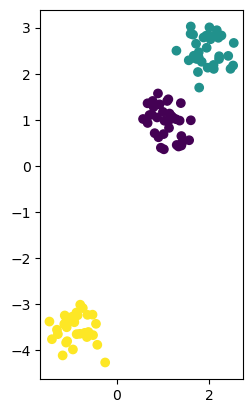

In [10]:
plot(attrs_mixed, clusters_mixed)

In [11]:
k_means_mixed = KMeans(init="random", n_clusters=3)
k_means_mixed.fit(attrs_mixed)
predictions_mixed = k_means.predict(attrs_mixed)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


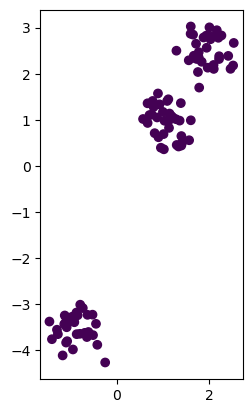

In [12]:
plot(attrs_mixed, predictions_mixed)

In [13]:
moons_attrs, moons_clusters = make_moons(noise=0.05)

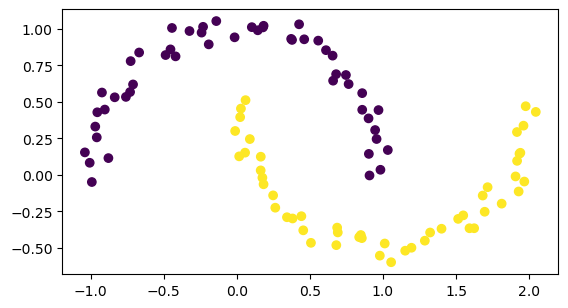

In [14]:
plot(moons_attrs, moons_clusters)

In [15]:
k_means_moons = KMeans(n_clusters = 2)

In [16]:
k_means_moons.fit(moons_attrs)
moons_prediction = k_means_moons.predict(moons_attrs)


C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


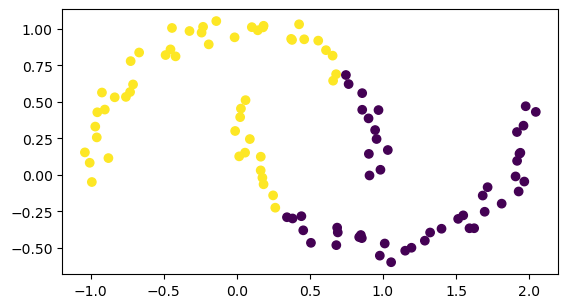

In [17]:
plot(moons_attrs, moons_prediction)

In [18]:
circles_attrs, circles_clusters = make_circles(factor=0.5)

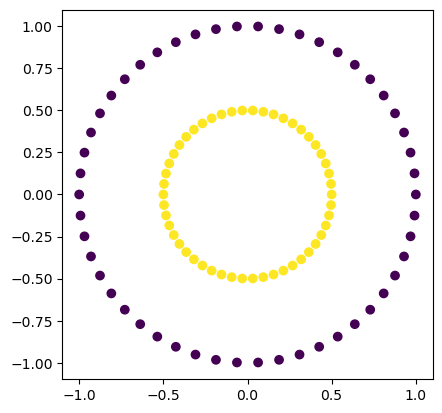

In [19]:
plot(circles_attrs, circles_clusters)

In [20]:
k_means_circles = KMeans(n_clusters=2)
k_means_circles.fit(circles_attrs)
circles_predictions = k_means_circles.predict(circles_attrs)


C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


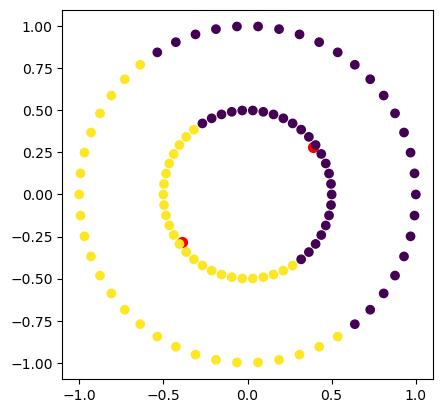

In [21]:
plt.scatter(k_means_circles.cluster_centers_[:,0], k_means_circles.cluster_centers_[:,1], c="r", s=50)
plot(circles_attrs, circles_predictions)

## K-means++

In [22]:
k_means = KMeans(init="k-means++", n_clusters=3 )

In [23]:
k_means.fit(attrs)
predictions = k_means.predict(attrs)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


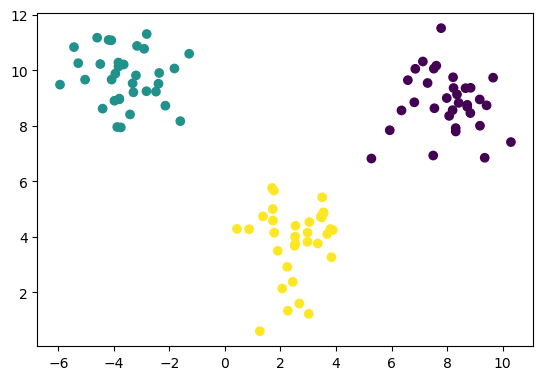

In [24]:
plot(attrs, predictions)

## Hierarchical / Agglomerative clustering

In [25]:
aggl = AgglomerativeClustering(n_clusters = 3)

In [26]:
aggl.fit(attrs)

AgglomerativeClustering(n_clusters=3)

In [27]:
aggl_clusters = aggl.fit_predict(attrs)

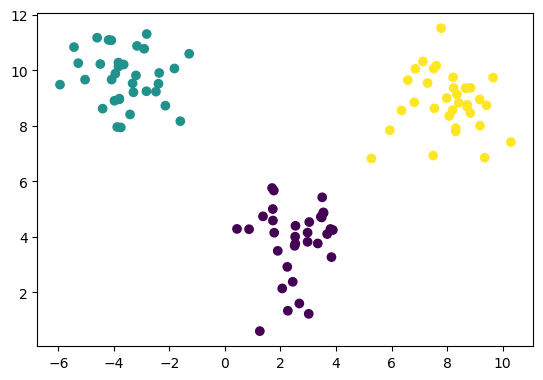

In [28]:
plot(attrs, aggl_clusters)

### Plotting the dendrogram

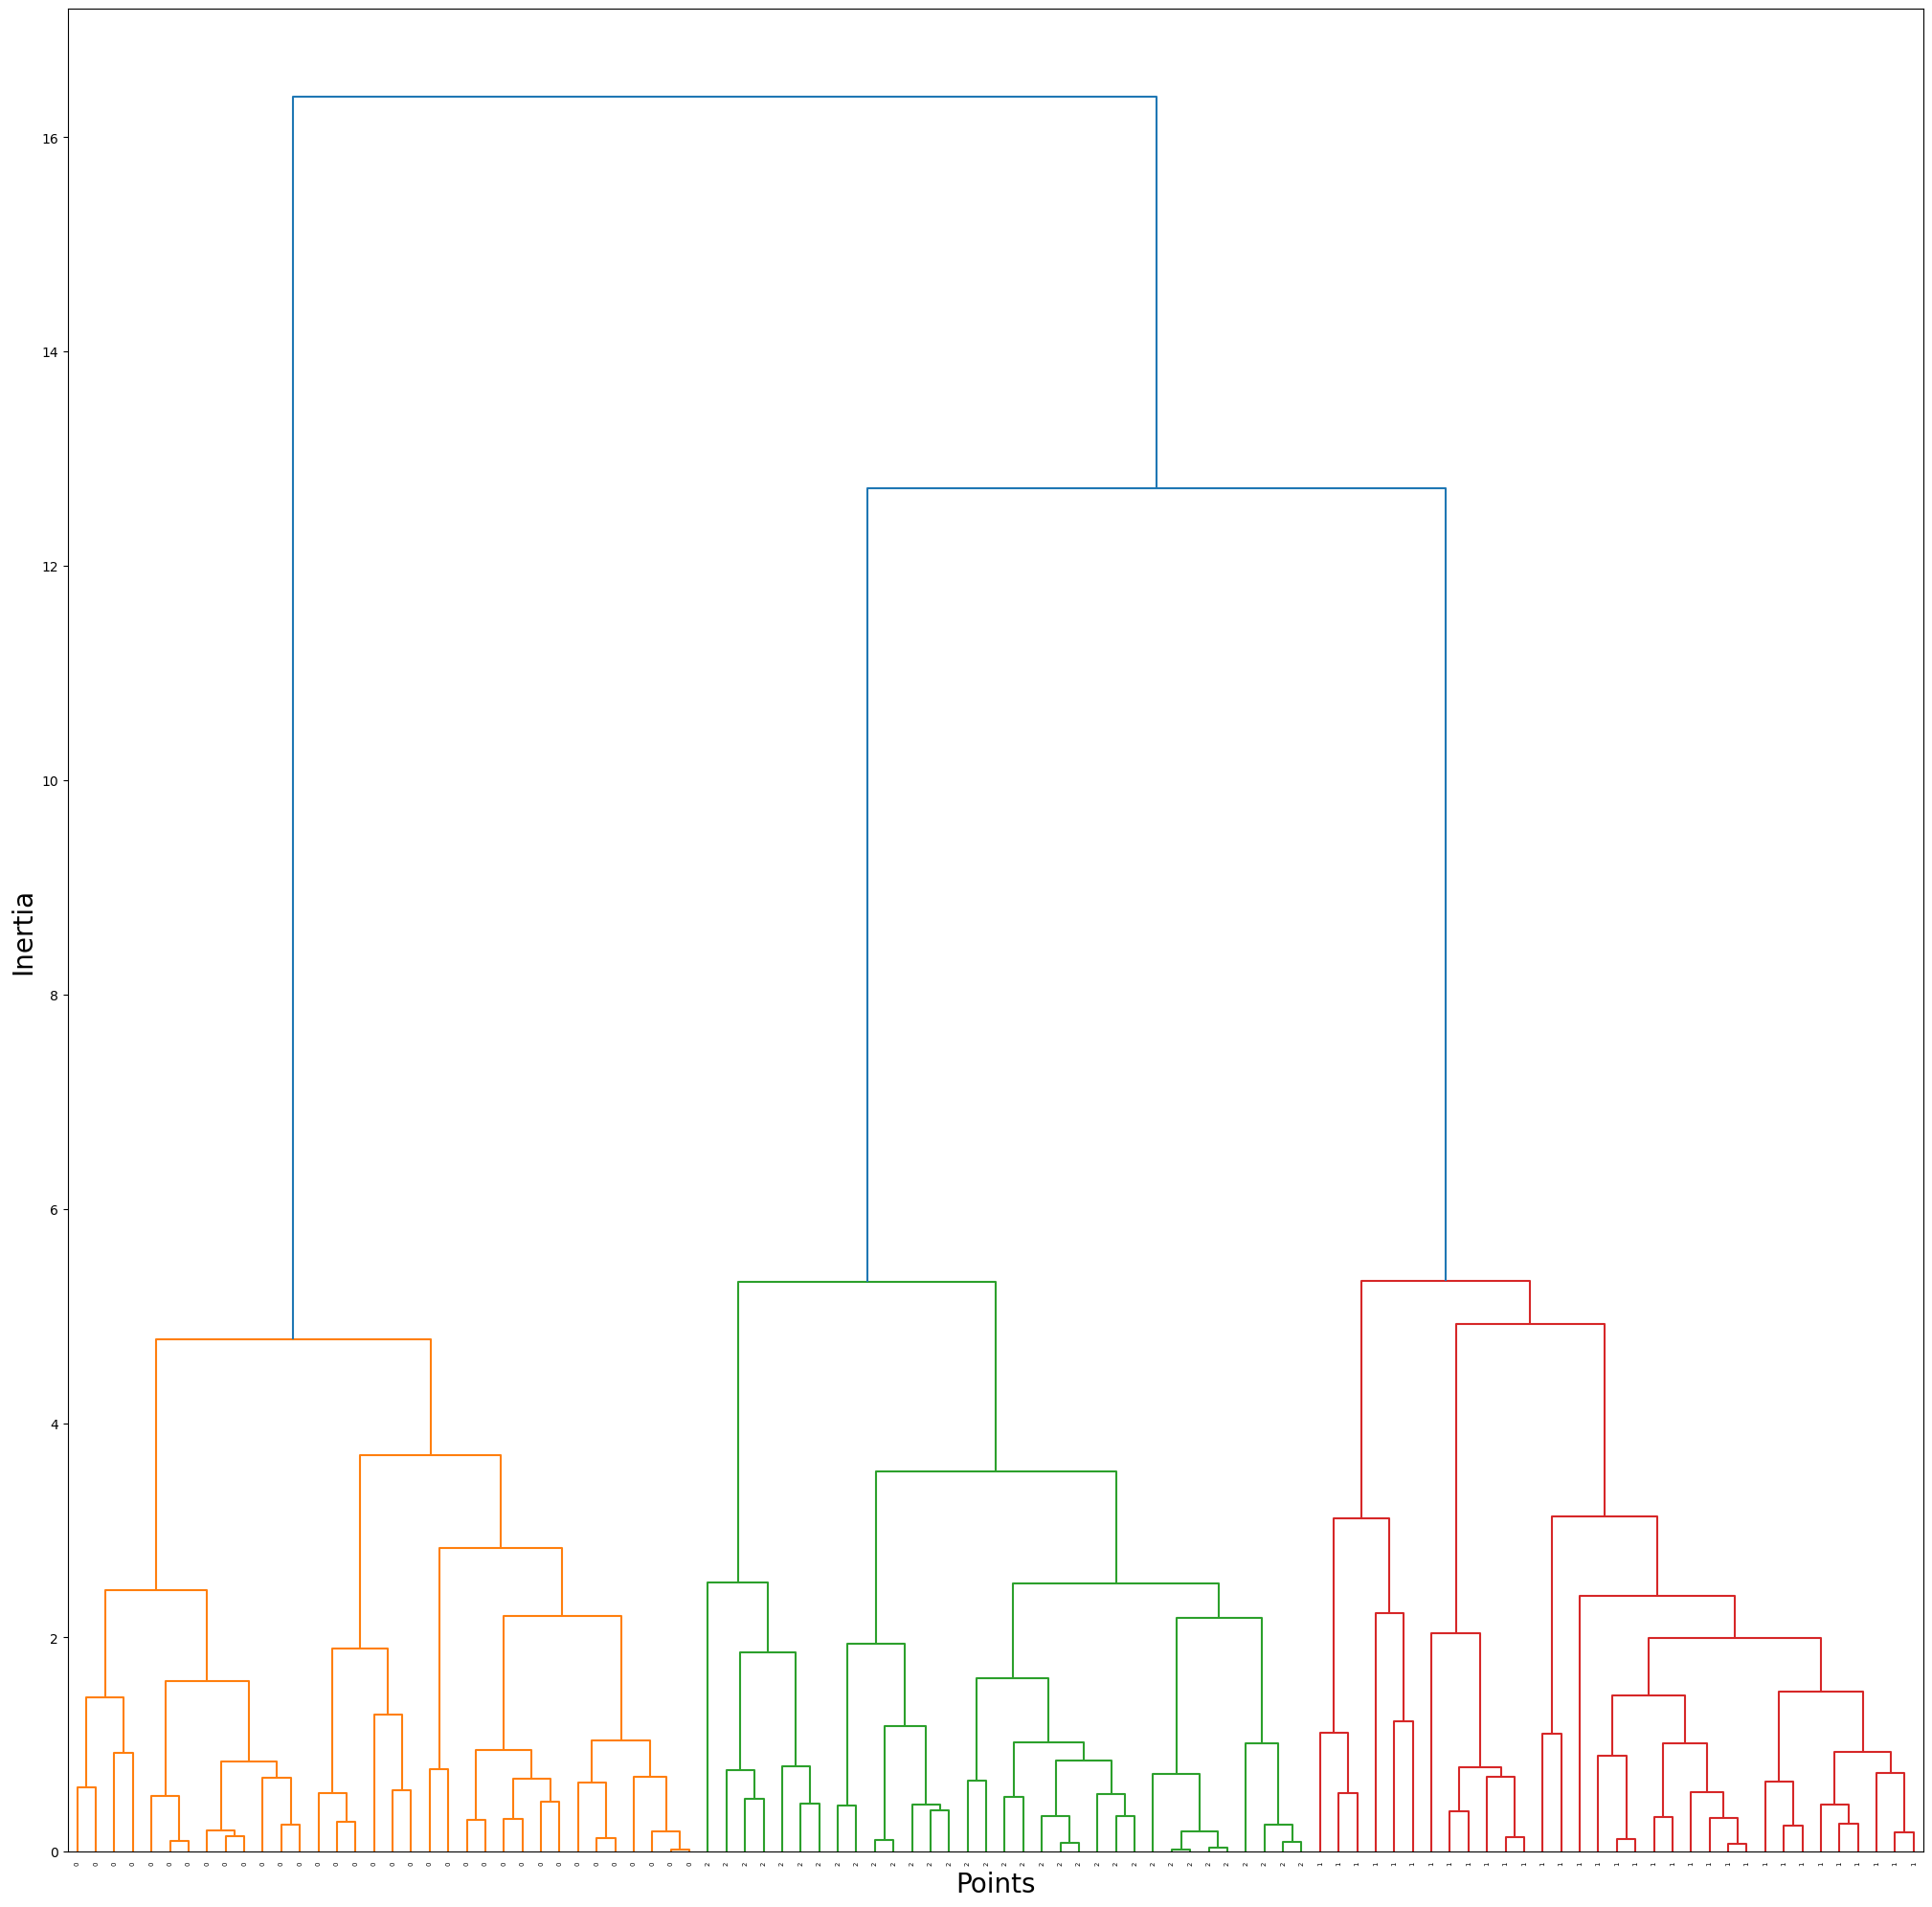

In [40]:
row_clusters = linkage(attrs, method="complete", metric="euclidean")
plt.figure(figsize = (25, 25))
dendrogram(row_clusters, labels = clusters)
plt.xlabel("Points", size=20)
plt.ylabel("Inertia", size=20)
plt.show()

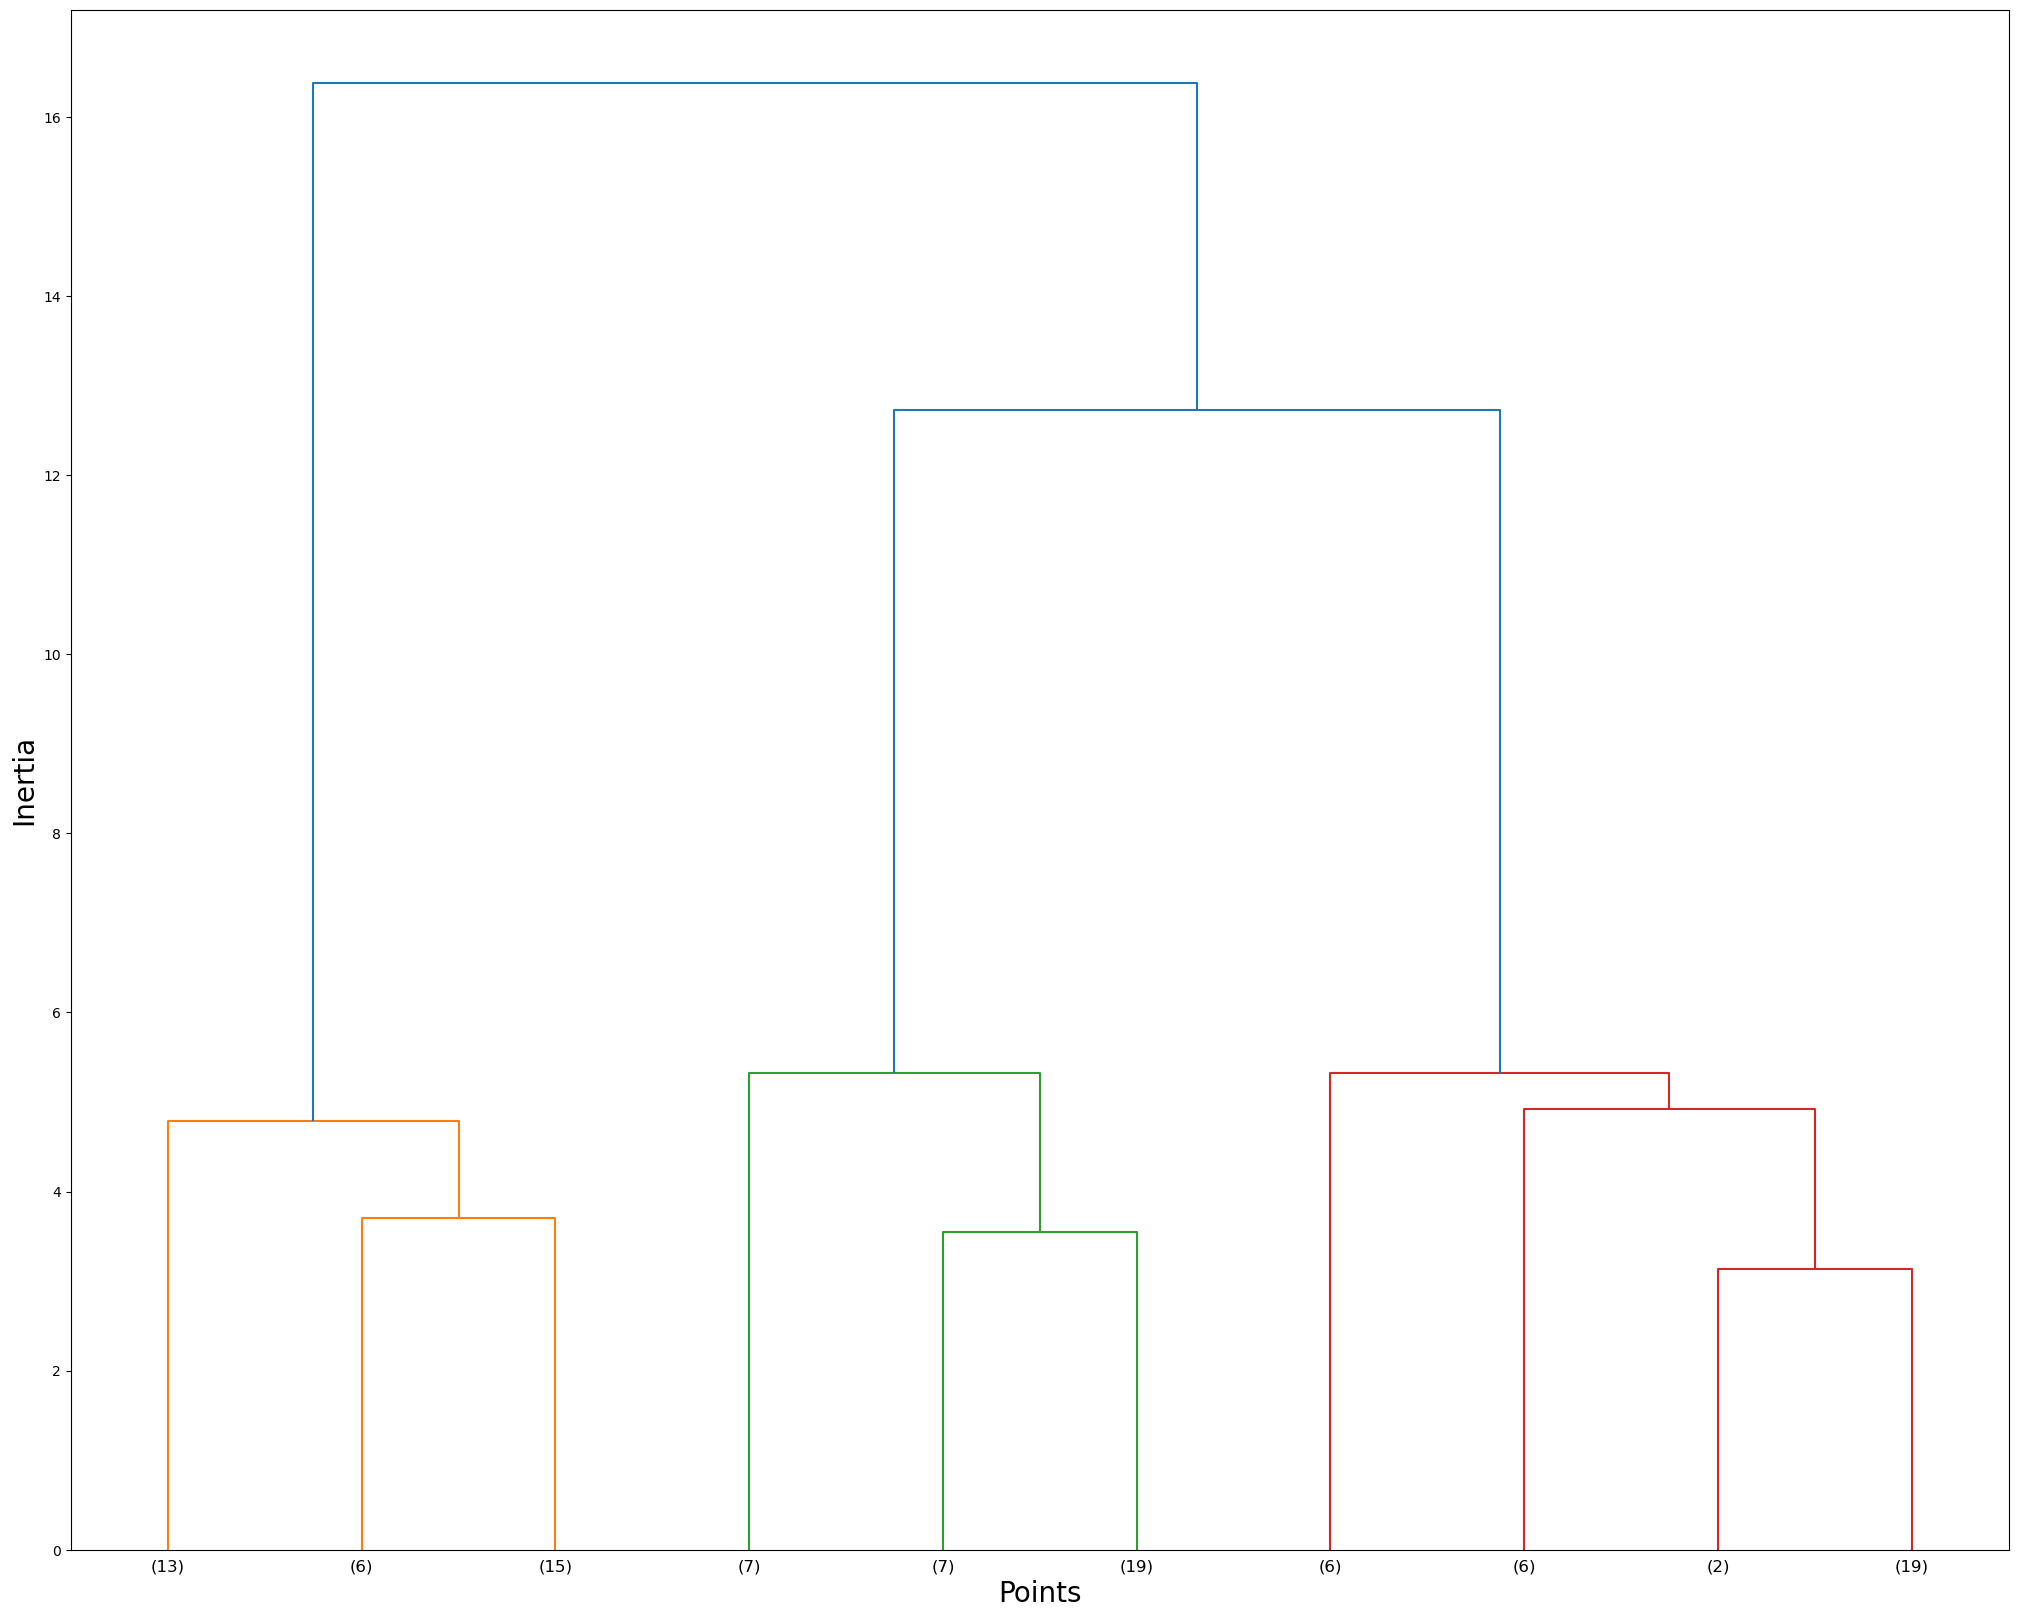

In [37]:
row_clusters = linkage(attrs, method="complete", metric="euclidean")
plt.figure(figsize = (25, 20))
dendrogram(row_clusters, labels = clusters, truncate_mode = "lastp", p=10)
plt.xlabel("Points", size=20)
plt.ylabel("Inertia", size=20)
plt.show()

In [38]:
row_clusters.shape

(99, 4)